<a href="https://colab.research.google.com/github/chamisfum/Kmeans_Opt_Data_Apotek/blob/master/Trial_apotek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [24]:
path = "/content/drive/My Drive/RESEARCH CENTER/THESIS RESEARCH/Apotek_Vinsia/"
data = pd.read_csv(path+'data_apotek.csv')
data

,No,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des
0,1,Mefinal,"Rp. 20.000,-/",210,2,13,17,20,15,21,18,21,15,11,12,17
1,2,Sanmol,"Rp. 15.000,-/",200,7,11,13,10,15,14,8,11,18,20,17,12
2,3,Hufagrip,"Rp 18.000,-/",150,2,8,6,10,12,15,12,11,13,18,13,12
3,4,Neurobion Putih,"Rp 19.500,-/",150,1,7,10,15,9,12,7,9,13,11,10,10
4,5,Lacto-B,"Rp 8.000,-/",250,4,23,26,20,22,28,22,20,19,15,23,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,158,Allopurinol 300mg,"Rp 5.500,-/",200,12,10,9,11,10,10,9,8,5,8,8,6
157,159,Lodia,"Rp 13.500,-/",150,1,9,10,11,9,10,9,9,8,5,2,2
158,160,Actifed,"Rp 54.000,-/",80,8,10,11,13,15,15,16,17,15,15,16,15
159,161,Bedak Herocy,"Rp 17.000,-/",100,12,10,12,11,10,10,9,8,6,8,9,9


In [25]:
data = data.sort_values(by=['Nama'], ascending=True)

In [26]:
data = data.drop(['No'], axis=1)
df = data.apply(lambda row : (row[1].split(",")[0].replace(" ","")), axis=1)
data["Harga"] = df.apply(lambda row: row.split("p")[1].replace(".",""))
data["Total_Sales"] = data.loc[:, 'Jan':'Des'].sum(1)
data[list(data.columns[1:])] = data[list(data.columns[1:])].apply(pd.to_numeric) 

In [27]:
data["Mean_Sales"] = data.loc[:, 'Jan':'Des'].mean(1)

In [28]:
data.dtypes

Nama            object
Harga            int64
Stok             int64
Jan              int64
Feb              int64
Mar              int64
Aprl             int64
Mei              int64
Juni             int64
Juli             int64
Agst             int64
Sep              int64
Okt              int64
Nov              int64
Des              int64
Total_Sales      int64
Mean_Sales     float64
dtype: object

In [29]:
data.head()

,Nama,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Total_Sales,Mean_Sales
45,Siladex,12000,150,1,13,10,11,11,9,10,8,9,10,8,10,110,9.166667
40,Acnol,14000,100,10,15,15,18,17,10,7,9,11,12,8,9,141,11.750000
117,Acnolution,14000,100,7,10,9,6,9,7,10,11,10,13,11,12,115,9.583333
158,Actifed,54000,80,8,10,11,13,15,15,16,17,15,15,16,15,166,13.833333
96,Acy Clopil,7500,100,10,13,10,11,10,9,10,8,12,10,7,7,117,9.750000


In [30]:
data.describe()

,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Total_Sales,Mean_Sales
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.00000,161.000000,161.00000,161.000000
mean,14394.409938,152.608696,6.565217,9.627329,9.900621,10.900621,10.801242,10.987578,10.254658,10.844720,10.726708,10.403727,10.68323,10.726708,122.42236,10.201863
std,13930.650776,47.821566,4.401396,4.567302,4.352018,4.257647,3.487155,3.811147,3.735438,3.313908,4.325777,4.194310,4.90844,4.940885,33.67652,2.806377
min,1500.000000,60.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,6.000000,1.000000,2.000000,2.00000,0.000000,65.00000,5.416667
25%,5000.000000,100.000000,2.000000,7.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.00000,8.000000,106.00000,8.833333
50%,10000.000000,150.000000,6.000000,10.000000,10.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,119.00000,9.916667
75%,18000.000000,200.000000,10.000000,13.000000,11.000000,14.000000,12.000000,12.000000,11.000000,11.000000,13.000000,12.000000,12.00000,12.000000,135.00000,11.250000
max,86000.000000,350.000000,16.000000,30.000000,33.000000,35.000000,28.000000,31.000000,38.000000,32.000000,36.000000,34.000000,35.00000,35.000000,371.00000,30.916667


In [31]:
data.isnull().sum()

Nama           0
Harga          0
Stok           0
Jan            0
Feb            0
Mar            0
Aprl           0
Mei            0
Juni           0
Juli           0
Agst           0
Sep            0
Okt            0
Nov            0
Des            0
Total_Sales    0
Mean_Sales     0
dtype: int64

In [32]:
data = data.drop(['Nama', 'Total_Sales', 'Mean_Sales'], axis=1)

In [33]:
data

,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des
45,12000,150,1,13,10,11,11,9,10,8,9,10,8,10
40,14000,100,10,15,15,18,17,10,7,9,11,12,8,9
117,14000,100,7,10,9,6,9,7,10,11,10,13,11,12
158,54000,80,8,10,11,13,15,15,16,17,15,15,16,15
96,7500,100,10,13,10,11,10,9,10,8,12,10,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,8000,100,1,15,11,14,12,11,10,9,8,8,10,9
43,55000,100,11,14,11,10,12,12,9,9,10,8,5,5
75,4500,150,2,3,4,5,5,3,6,10,10,11,10,11
72,1500,100,15,12,15,16,15,16,10,11,8,9,8,10


In [34]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(data) 

scaled_df

array([[-0.17241699, -0.05472082, -1.26836626, ..., -0.09655614,
        -0.54836202, -0.14753946],
       [-0.02840072, -1.10353646,  0.7828198 , ...,  0.38176813,
        -0.54836202, -0.35056384],
       [-0.02840072, -1.10353646,  0.09909111, ...,  0.62093027,
         0.06473718,  0.25850931],
       ...,
       [-0.71247797, -0.05472082, -1.0404567 , ...,  0.14260599,
        -0.13962922,  0.05548492],
       [-0.92850237, -1.10353646,  1.92236762, ..., -0.33571828,
        -0.54836202, -0.14753946],
       [-0.31643325, -0.05472082, -0.81254714, ...,  0.38176813,
         1.49530198,  0.86758246]])

In [35]:
Mscaler = MinMaxScaler()
minmax = Mscaler.fit_transform(data) 

In [36]:
# Normalizing the Data 
normalized_df = normalize(minmax) 

normalized_df

array([[0.13159417, 0.3286613 , 0.        , ..., 0.26475493, 0.19254904,
        0.30257707],
       [0.11124596, 0.10372727, 0.45121361, ..., 0.23500709, 0.1367314 ,
        0.19337726],
       [0.15305755, 0.14271297, 0.41386762, ..., 0.35566749, 0.28218247,
        0.35474367],
       ...,
       [0.05145265, 0.44976717, 0.09661665, ..., 0.40760149, 0.35133327,
        0.45547849],
       [0.        , 0.09368664, 0.63394625, ..., 0.14858115, 0.12349602,
        0.19406518],
       [0.09956111, 0.30716521, 0.13196728, ..., 0.30929831, 0.47988101,
        0.42418053]])

In [37]:
pca = PCA(n_components=2)
pca.fit(normalized_df)
X_pca = pca.transform(normalized_df)
print("original shape:   ", normalized_df.shape)
print("transformed shape:", X_pca.shape)
X_pca[:10]

original shape:    (161, 14)
transformed shape: (161, 2)


array([[-0.1900622 ,  0.30255775],
       [ 0.2562626 ,  0.1261828 ],
       [ 0.01186199, -0.15286752],
       [-0.01288386, -0.07505324],
       [ 0.28209647, -0.0310616 ],
       [ 0.38470819, -0.03846438],
       [ 0.34909204,  0.05238709],
       [ 0.33839065, -0.07652019],
       [ 0.41909936, -0.09963757],
       [ 0.27144559,  0.01288526]])

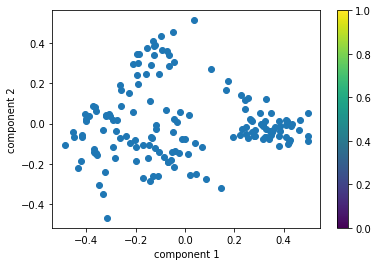

In [38]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

17.540649237468582
7.424151624045995
4.021103000471332
2.500719240549823
2.0546708918601695
1.7533125243741494
1.4880532812701586
1.323166045499463
1.1666979817776224


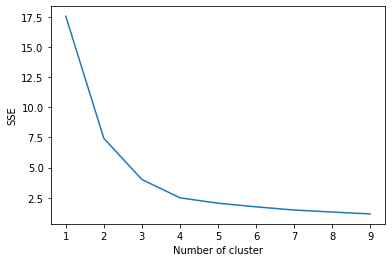

In [39]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_pca)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(kmeans.inertia_ )
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

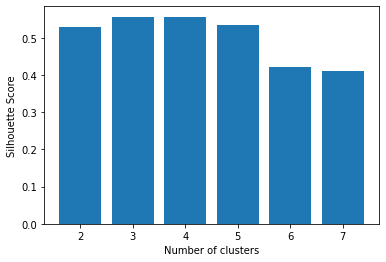

In [40]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_pca, KMeans(n_clusters = n_cluster).fit_predict(X_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

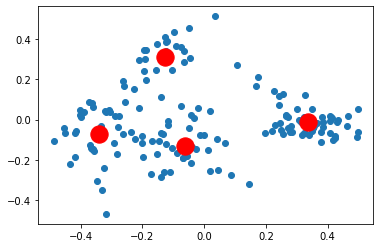

In [41]:
kmeans = KMeans(n_clusters=4)
pred_y = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [43]:
data['Labels'] = kmeans.labels_

data.head(10)

,Harga,Stok,Jan,Feb,Mar,Aprl,Mei,Juni,Juli,Agst,Sep,Okt,Nov,Des,Labels
45,12000,150,1,13,10,11,11,9,10,8,9,10,8,10,3
40,14000,100,10,15,15,18,17,10,7,9,11,12,8,9,1
117,14000,100,7,10,9,6,9,7,10,11,10,13,11,12,0
158,54000,80,8,10,11,13,15,15,16,17,15,15,16,15,0
96,7500,100,10,13,10,11,10,9,10,8,12,10,7,7,1
107,54000,150,10,10,11,9,10,8,10,7,4,5,5,5,1
128,2500,200,15,17,15,16,16,16,10,11,8,9,7,10,1
156,5500,200,12,10,9,11,10,10,9,8,5,8,8,6,1
36,5000,100,12,10,9,11,10,10,9,8,5,8,8,6,1
18,18000,150,10,12,9,10,13,12,9,11,10,8,5,8,1


In [44]:
kmeans.labels_


array([3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 3, 1, 2, 2,
       0, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 3, 0, 1, 0, 1, 2, 3, 2, 1, 0, 0, 3, 0, 3, 2, 3, 1, 2, 0, 1, 2,
       0, 0, 2, 3, 1, 0, 3, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 3, 3, 3, 1, 3, 2, 0, 2,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 3,
       2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 3, 2, 3,
       3, 3, 3, 1, 2, 1, 2], dtype=int32)

In [46]:
labels.astype(np.float)

array([3., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 3., 1., 1., 2., 3.,
       1., 3., 1., 2., 2., 0., 2., 2., 2., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 3., 0., 1., 0., 1., 2.,
       3., 2., 1., 0., 0., 3., 0., 3., 2., 3., 1., 2., 0., 1., 2., 0., 0.,
       2., 3., 1., 0., 3., 0., 0., 3., 3., 1., 0., 1., 1., 1., 3., 0., 3.,
       1., 2., 0., 0., 2., 2., 2., 2., 2., 1., 1., 0., 1., 0., 0., 1., 0.,
       3., 3., 3., 1., 3., 2., 0., 2., 1., 1., 0., 2., 0., 3., 2., 0., 0.,
       1., 1., 1., 1., 1., 3., 2., 1., 1., 2., 1., 2., 3., 2., 0., 2., 0.,
       1., 0., 2., 1., 1., 1., 0., 1., 2., 0., 2., 2., 2., 0., 1., 3., 2.,
       3., 3., 3., 3., 1., 2., 1., 2.])

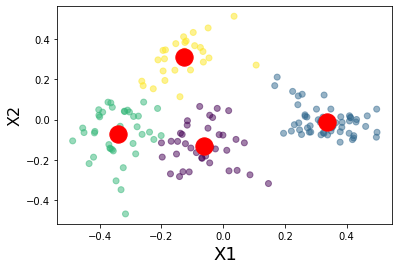

In [45]:
labels = kmeans.labels_
# print(kmeans.labels_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)

plt.show()

## **PSO + KMEANS**